In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io as sio
import math
from scipy.optimize import fmin_tnc
#plt.style.use('ggplot')
plt.xkcd()

In [2]:
data = sio.loadmat('ex3data1.mat')

In [76]:
X = data['X']
y = data['y']

m, n = X.shape
num_labels = 10
l = 1

In [4]:
def displayData(X, width=round(math.sqrt(X.shape[1]))):
    plt.figure(figsize=(10, 6))
    m, n = X.shape
    height = n // width
    
    display_rows = math.floor(math.sqrt(m))
    display_cols = math.ceil(m / display_rows)
    
    pad = 1
    
    display_array = -np.ones((pad + display_rows * (height + pad), \
                            pad + display_cols * (width + pad))) 
    curr_ex = 0
    for j in range(0, display_rows):
        for i in range(0, display_cols):
            max_val = np.absolute(X[curr_ex]).max()
            row, col = np.indices((height, width))
            display_array[pad + j * (height+pad) + row, \
                          pad + i * (width+pad) + col] = \
                            X[curr_ex].reshape(height, width, order='F') / max_val
                            #np.reshape(X[curr_ex], (height, width)) / max_val
            curr_ex += 1
        if curr_ex > m:
            break
    plt.imshow(display_array)

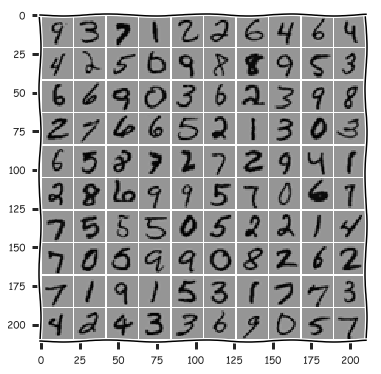

In [33]:
# Preview numbers
sel = X[np.random.randint(1, len(X), (100))] # Randomly select 100 numbers
displayData(sel)

In [34]:
# Logistic regression - One vs All

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def costFunctionReg(theta, X, y, l):
    m = y.size
    theta = theta.reshape((X.shape[1], 1))
    hypothesis = sigmoid(X @ theta)
    J = -1/m * (y.T @ np.log(hypothesis) + (1 - y).T @ np.log(1 - hypothesis)) + \
        l/(2*m) * theta[1:].T @ theta[1:]
    return J

def gradFunctionReg(theta, X, y, l):
    m = y.size
    theta = theta.reshape((X.shape[1], 1))
    hypothesis = sigmoid(X @ theta)
    filter = np.ones(theta.shape)
    filter[0] = 0
    grad = 1/m * (X.T @ (hypothesis - y)) + l/m * theta * filter    
    return grad

def oneVsAll(X, y, num_labels, l):
    m, n = X.shape
    
    all_theta = np.zeros((num_labels, n+1));
    theta_init = np.zeros((n+1, 1))
    X = np.insert(X, 0, 1, axis=1)
    
    for c in range(1, num_labels+1):
        all_theta[c-1] = fmin_tnc(func=costFunctionReg, x0=theta_init, fprime=gradFunctionReg, args=(X, y == c, l))[0]
    
    return all_theta

In [35]:
all_theta = oneVsAll(X, y, num_labels, l)

In [78]:
# Calculate predictions for each example
pred = (np.argmax(np.insert(X, 0, 1, axis=1) @ all_theta.T, axis=1) + 1).reshape((m,1))
accuracy = np.mean(pred == y) * 100
print('Training set accuracy: {}'.format(accuracy))

Training set accuracy: 94.46
